# QGIS의 데이터 파일 종류 - 텍스트, 엑셀 데이터 다루기
- 백터 데이터 (*.shp 파일)
- 레스터 데이터 (일반 이미지)
- 텍스트 데이터 (*.csv 등)
- 엑셀 데이터 (*.xlsx)

## 1. 작업준비
### 1) 프로젝트 생성 및 데이터 파일 배치
- 작업 폴더 안에 'Lab03' 폴더를 생성하고 경상남도의 shp 파일을 프로젝트 작업폴더 안에 배치
    - gisdeveloper이나 data.nsdi.go.kr에서 다운로드 받을 수 있음

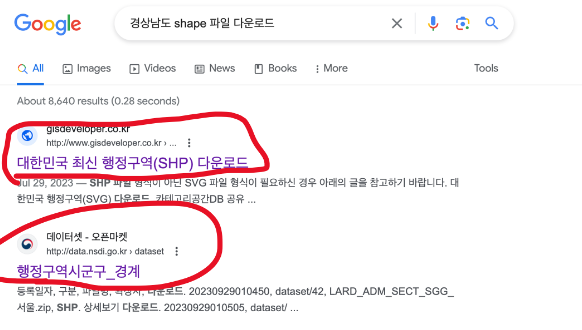

In [2]:
from IPython.display import display, Image
display(Image(filename='image19_shpdownload.png'))

- 임의의 프로젝트를 생성한 후 'Lab03' 폴더에 저장
### 2) 백터 (지도) 레이어 추가
- 탐색기에서 shp 파일을 더블클릭하여 지도 레이어에 추가한 후 추가된 레이어의 이름을 경상남도로 바꾼다
- 구글에서 '행정구역 읍면동' 검색하여 '국가공간정보포털'에서 '행정구역_읍면동(법정동)' 다운로드
    - 데이터와 (LSMD_ADM_SECT_UMD_경남.zip) 이를 설명하는 테이블정의서 (LSMD_ADM_SECT_UMD.xlsx) 다운받아서 확인
### 3) 한글 글자가 깨지는 경우
- encoding을 UTF-8 이나 EUC-KR로 변경하면 됨
### 4) 원하는 지역(진주시)만 추출
- 'LSMD_ADM_SECT_UMD_48_202309' 파일의 속성 테이블 (우클릭, Open Attribute Table)을 보면 ;'COL_ADM_SE'라는 '원천시군구코드'가 있다 (테이블정의서 참조)
- 행정표준코드관리시스템 - 법정동코드목록조회 (www.code.go.kr/stdcode/regCodeL.do)에서 지역선택: 경상남도, 진주시 검색
    - 진주시는 '48170'으로 시작하는 것 확인
- 속성 테이블에서 'select features using an expression' 버튼을 선택하면 표현식으로 원하는 항목(도면) 선택 가능
    - 진주시만 선택할 시 Expression 칸에 'COL_ADM_SE' = 48170 이라고 입력하고 Select Features 버튼 누르면 진주시만 선택됨

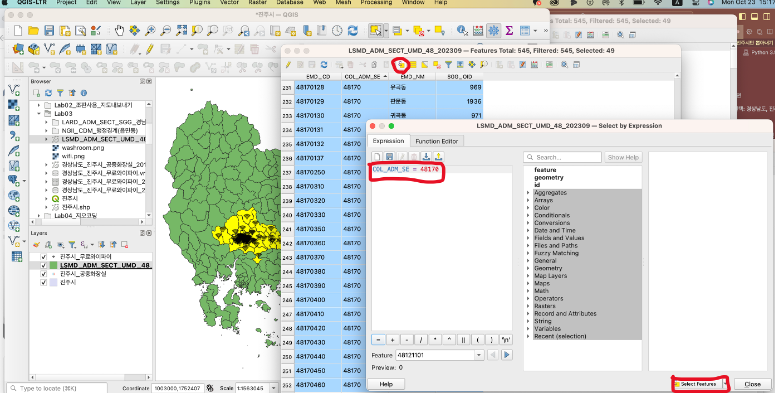

In [6]:
display(Image('image21_select.png'))

- 파일 저장하기
    - 선택된 상태에서 레이어 우클릭 > Export > Save Selected Features As ... > Format: Shapefile, File name: 경로 및 이름 잡아주기 > encoding: 필요시 잡아주기 > Save only selected features 클릭 > Add saved file to map 클릭하면 저장과 동시에 지도에 레이어 추가됨 > OK 클릭

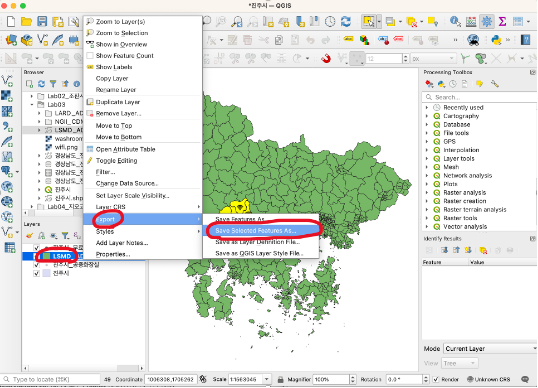

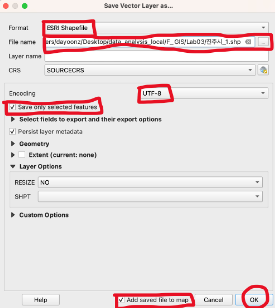

In [9]:
display(Image('image22_export.png'))
display(Image('image23_save.png'))

## 2. 텍스트 데이터 (csv) 추가하기
- 수업시간에는 배포되는 '경상남도_진주시_공중화장실.csv' 파일을 작업 폴더에 배치한다
### 1) 텍스트 데이터 레이어로 추가
- Layer > Add Layer > Add Delimited Text Layer > 파일 선택, Encoding 맞추기(한글 깨질 경우 euc-kr 이나 utf-8), csv원본에서 지울 field값들 (앞에서부터) 지정, X field:경도, Y field: 위도, Geometry CRS: 맞는 좌표계 (이 실습에서는 기본 좌표계인 EPSG: 4326 - WGS84)
- WGS84 = 위, 경도 좌표를 말하는 체계

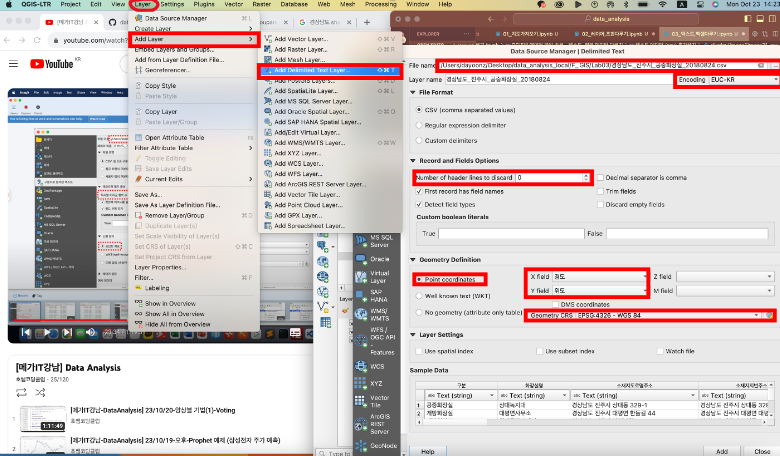

In [3]:
display(Image('image20_csv.png'))

### 2) 텍스트 데이터에서 위경도 (점) shape file 저장

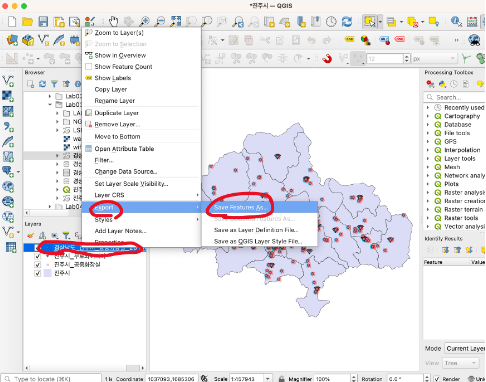

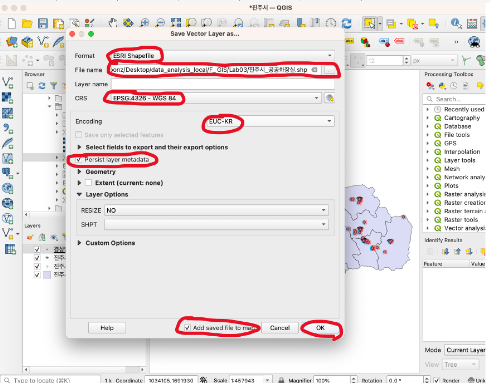

In [11]:
display(Image('image24_point.png'))
display(Image('image25_save.png'))

## 3. 텍스트 (xlsx 엑셀) 파일 추가하기
### 1) plugin 깔기
    - Plugins > Manage and Install Plugins > All > 검색창에 Spreadsheet Layers 깔기
    - Spreadsheet Layers 옆에 체크박스 체크해줘야지 왼쪽에 새로운 엑셀 버튼이 추가됨

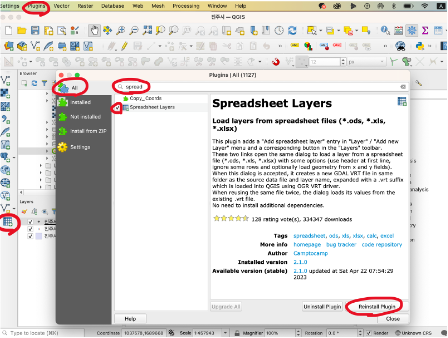

In [12]:
display(Image('image26_excel.png'))

### 2) 텍스트 (엑셀) 데이터 추가
- 왼쪽에 추가된 버튼을 클릭 > File Name: 원하는 데이터 선택 > Layer name: 이름 설정 > Rows - Number of lines to ignore: 원하면 지정 (실습에서는 지정 안함) > Geometry 체크 (위경도 데이터 사용할 경우 - 실습에서는 사용함), x filed: 경도, y field: 위도, Reference system: 맞는 좌표계 (EPSG: 4326 - WGS 84) > 표 테이블에서 데이터 타입 지정 가능 (위도와 경도 - Real - 실수 타입 확인) > OK

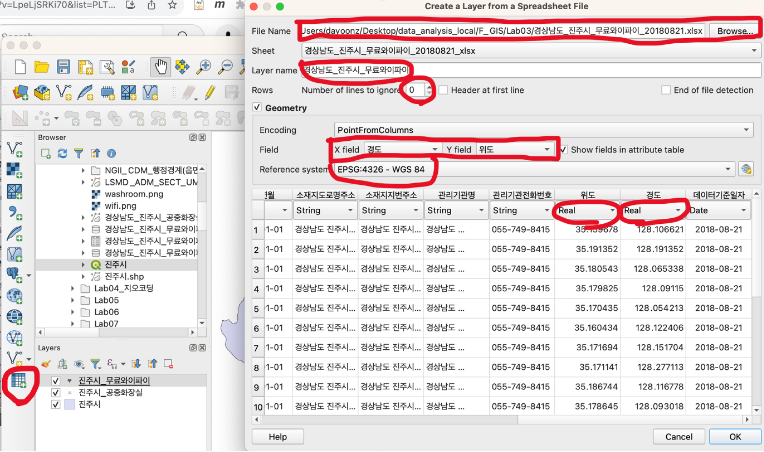

In [14]:
display(Image('image27_excel.png'))

### 2) 텍스트 데이터에서 위경도 (점) shape file 저장

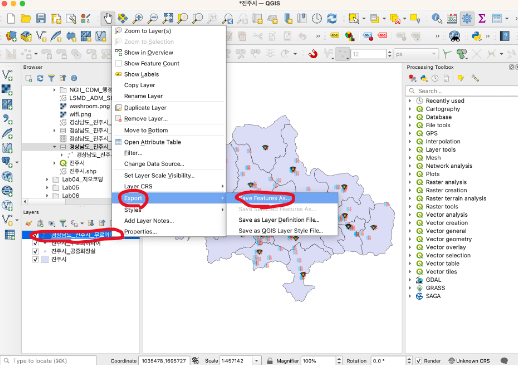

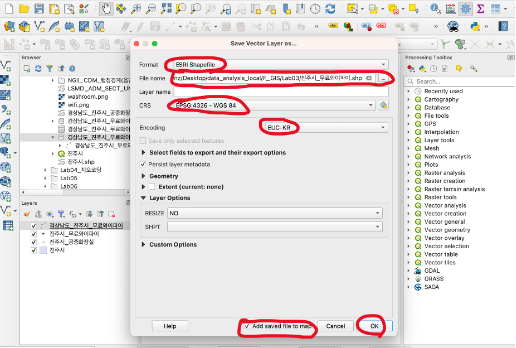

In [15]:
display(Image('image28_save.png'))
display(Image('image29_save.png'))

## 4. 포인트 마커 꾸미기
- 포인트 점 이미지 파일로 설정
    - 포인트 레이어 더블클릭 > Symbology > Single Symbol 선택 > Marker 밑에 Single Marker (나중에 Raster Image Marker로 선택하면 이름 바뀜) 선택 > Symbol layer type: Raster Image Marker 선택, 원하는 이미지파일 선택, Width Height 사이즈 잡아주기, Opacity 투명도 잡아주기 > OK

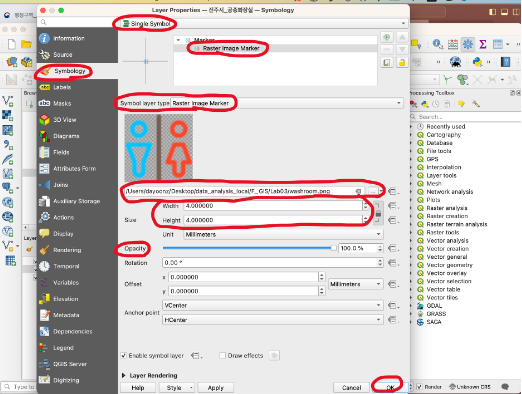

In [3]:
display(Image('image30_point.png'))

## 5. 폴리곤 꾸미기
- 라벨 추가 Label
    - 폴리곤 파일 더블클릭('진주시') > Labels > Single Labels > Value: EMD_NM (읍면동 이름) > Text -> Font: 원하는 글꼴, Size: 크기 설정, Color: 색상 설정, Opacity: 투명도 설정 > Buffer -> Draw text Buffer 체크 (글자 주변에 테두리를 싸줌 - 더 눈에 띄게)

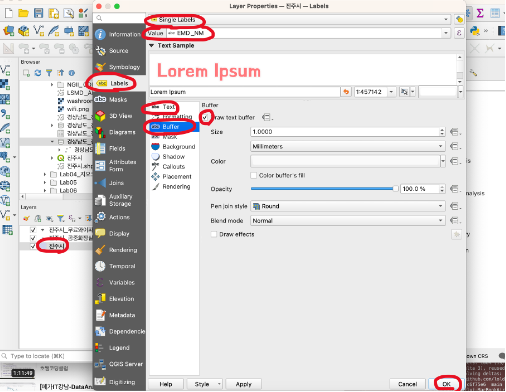

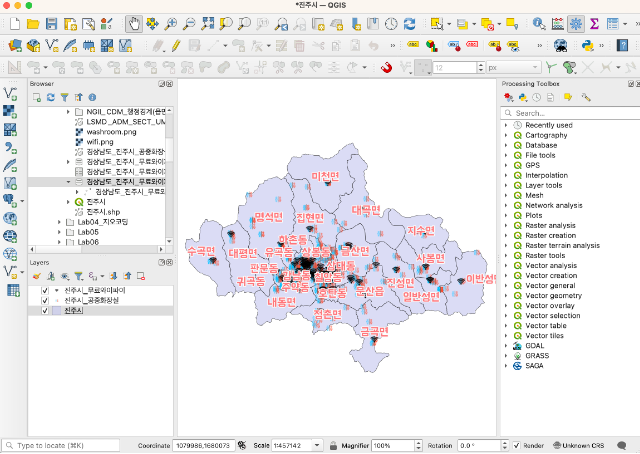

In [4]:
display(Image('image31_decorate.png'))
display(Image('image32_result.png'))